# Vector dot product

You already know how to add vectors and multiply them by scalars in $\mathbb{R}^n$. However, we have not yet discussed whether it is possible to multiply vectors by *other vectors* in $\mathbb{R}^n$.

In this section, you will learn one way to construct such a new algebraic operation. This construction provides new and more advanced geometric tools and sheds fresh light on the concepts of angle and orthogonality.

At first glance, this may sound overly abstract or disconnected from real-life applications. However, you will see that the opposite is true.

## Motivation

Let us look at a plane, which is a classical representation of a two-dimensional vector space $\mathbb{R}^2$. A basis
$$
\{\vec e_1, \vec e_2\}
$$
of $\mathbb{R}^2$ is typically chosen in such a way that $\vec e_1$ and $\vec e_2$ are perpendicular to each other and the length of each of them is equal to $1$ (see the picture below).

In this setting, a vector
$$
\vec x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
$$
is identified with
$$
x_1 \vec e_1 + x_2 \vec e_2 .
$$

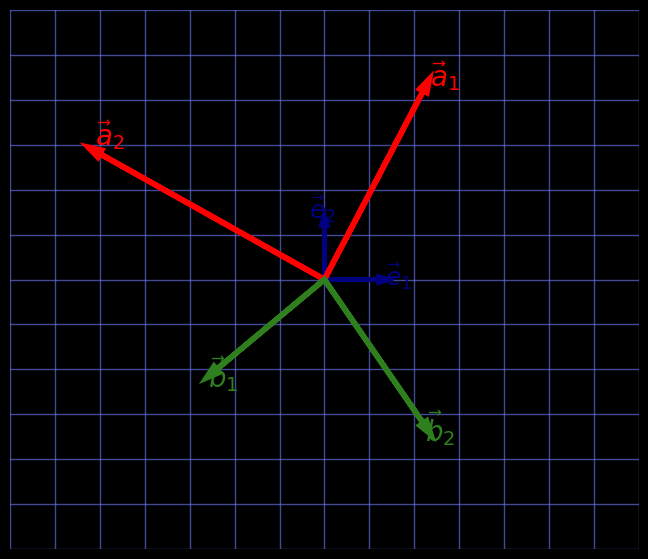

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Figure setup ---
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_aspect('equal')

# Limits chosen to match image framing
ax.set_xlim(-7, 7)
ax.set_ylim(-6, 6)

# --- Grid (light blue) ---
ax.set_xticks(np.arange(-7, 8, 1))
ax.set_yticks(np.arange(-6, 7, 1))
ax.grid(True, color='#6f7cff', linewidth=1, alpha=0.6)

# Remove axes spines and ticks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# --- Basis vectors e1, e2 (blue) ---
ax.arrow(0, 0, 1.2, 0,
         head_width=0.15, head_length=0.25,
         linewidth=3, fc='navy', ec='navy', zorder=5)

ax.arrow(0, 0, 0, 1.2,
         head_width=0.15, head_length=0.25,
         linewidth=3, fc='navy', ec='navy', zorder=5)

ax.text(1.35, -0.15, r"$\vec e_1$", fontsize=18, color='navy')
ax.text(-0.35, 1.35, r"$\vec e_2$", fontsize=18, color='navy')

# --- Red vectors a1, a2 ---
a1 = np.array([2.2, 4.2])
a2 = np.array([-5.0, 2.8])

ax.arrow(0, 0, *a1,
         head_width=0.18, head_length=0.30,
         linewidth=4, fc='red', ec='red', zorder=6)

ax.arrow(0, 0, *a2,
         head_width=0.18, head_length=0.30,
         linewidth=4, fc='red', ec='red', zorder=6)

ax.text(a1[0] + 0.15, a1[1] + 0.1, r"$\vec a_1$", fontsize=20, color='red')
ax.text(a2[0] - 0.1, a2[1] + 0.2, r"$\vec a_2$", fontsize=20, color='red')

# --- Green vectors b1, b2 ---
b1 = np.array([-2.4, -2.0])
b2 = np.array([2.2, -3.2])

ax.arrow(0, 0, *b1,
         head_width=0.18, head_length=0.30,
         linewidth=4, fc='#2f7f1f', ec='#2f7f1f', zorder=6)

ax.arrow(0, 0, *b2,
         head_width=0.18, head_length=0.30,
         linewidth=4, fc='#2f7f1f', ec='#2f7f1f', zorder=6)

ax.text(b1[0] - 0.2, b1[1] - 0.4, r"$\vec b_1$", fontsize=20, color='#2f7f1f')
ax.text(b2[0] + 0.05, b2[1] - 0.4, r"$\vec b_2$", fontsize=20, color='#2f7f1f')

plt.show()

Now let us look at another pair of perpendicular vectors
$$
\vec a_1 =
\begin{pmatrix}
2 \\
4
\end{pmatrix},
\qquad
\vec a_2 =
\begin{pmatrix}
-6 \\
3
\end{pmatrix}.
$$

We will perform a non-obvious procedure: multiply the first coordinates of both vectors and add them to the product of the second coordinates, namely,
$$
2 \cdot (-6) + 4 \cdot 3 = -12 + 12 = 0.
$$

Notice that the sum is zero.

If you repeat this calculation with another pair of perpendicular vectors, for example,
$$
\vec b_1 =
\begin{pmatrix}
-3 \\
-2
\end{pmatrix},
\qquad
\vec b_2 =
\begin{pmatrix}
2 \\
-3
\end{pmatrix},
$$
you again obtain
$$
(-3)\cdot 2 + (-2)\cdot(-3) = 0.
$$

On the contrary, if you take non-perpendicular vectors $\vec a_1$ and $\vec b_1$, you get
$$
2 \cdot (-3) + 4 \cdot (-2) = -14 \neq 0.
$$

It seems that we have stumbled upon a criterion for perpendicularity of vectors. But how are these seemingly strange calculations related to the mutual arrangement of vectors? Let us find out.

## Definition and Properties

Let us start with the formal definition. Define the **dot product** of two arbitrary column vectors
$$
\vec x =
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix},
\qquad
\vec y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$
from $\mathbb{R}^n$ by
$$
\vec x \cdot \vec y
=
\sum_{k=1}^{n} x_k y_k
=
x_1 y_1 + x_2 y_2 + \cdots + x_k y_k + \cdots + x_n y_n .
$$

Thus, given a pair of vectors, the dot product returns a real number (a scalar), which is the sum of the pairwise products of their coordinates. This is why it is sometimes referred to as a **scalar product**.

Although the dot product does not produce an object of the same nature as its inputs, it shares several properties with ordinary multiplication of numbers.

### Commutativity

$$
\vec x \cdot \vec y = \vec y \cdot \vec x .
$$

This follows immediately from the fact that
$$
x_k y_k = y_k x_k .
$$

### Distributivity

$$
\vec x \cdot (\vec y + \vec z)
=
\vec x \cdot \vec y + \vec x \cdot \vec z .
$$

Indeed,
$$
x_k (y_k + z_k) = x_k y_k + x_k z_k .
$$

### What the Dot Product Is *Not*

Despite these similarities, there are important differences between the dot product and ordinary multiplication. In particular, the **associative property does not apply**.

The expression
$$
(\vec v_1 \cdot \vec v_2)\cdot \vec v_3
$$
is not a dot product of three vectors. Instead, it is the product of a scalar $\vec v_1 \cdot \vec v_2$ and a vector $\vec v_3$, which is a completely different operation.

### Bilinearity

A key idea of vector spaces is that vectors interact with vectors through addition and with scalars through multiplication. The most general way the dot product interacts with these operations is expressed by **bilinearity**:

$$
(\alpha_1 \vec x_1 + \alpha_2 \vec x_2)\cdot(\beta_1 \vec y_1 + \beta_2 \vec y_2)
=
\alpha_1 \beta_1 \vec x_1 \cdot \vec y_1
+
\alpha_1 \beta_2 \vec x_1 \cdot \vec y_2
+
\alpha_2 \beta_1 \vec x_2 \cdot \vec y_1
+
\alpha_2 \beta_2 \vec x_2 \cdot \vec y_2 .
$$

In particular,
$$
(\alpha \vec x)\cdot(\beta \vec y) = \alpha \beta (\vec x \cdot \vec y),
$$
where Greek letters denote scalars.

The bilinear property follows directly from the definition of the dot product.

Bilinearity means that the dot product is linear in each argument separately. This makes computations with vectors very similar to computations with numbers and often allows one to proceed without knowing the vectors explicitly.

### Example

Suppose
$$
\vec x \cdot \vec x = 4
\quad \text{and} \quad
\vec x \cdot \vec y = -1 .
$$

Then
$$
\begin{aligned}
3 \vec x \cdot \left(\tfrac{1}{4}\vec x - 2\vec y\right)
&=
\tfrac{3}{4} \vec x \cdot \vec x - 6 \vec x \cdot \vec y \\
&=
\tfrac{3}{4}\cdot 4 - 6\cdot(-1) \\
&=
3 + 6 \\
&=
9 .
\end{aligned}
$$

### A Word of Caution

Despite the many similarities between the dot product and ordinary multiplication, they are fundamentally different operations. In particular, when dot products appear repeatedly in an expression, it is essential to pay close attention to the order of operations, since associativity does not apply in the usual sense.

## Geometric Interpretation (Plane)

So far, we have described many algebraic properties of the dot product, showing that vectors can be “multiplied” in a way that is similar to numbers or algebraic expressions with variables. However, when we first motivated the introduction of the dot product, we emphasized its **geometric meaning**.

Let us now establish the connection between the dot product and geometry. This correspondence between algebraic and geometric properties allows us to combine these two central areas of mathematics, enabling us to translate geometric concepts into algebraic language and back again.

To begin, let us return to the familiar example of the plane.

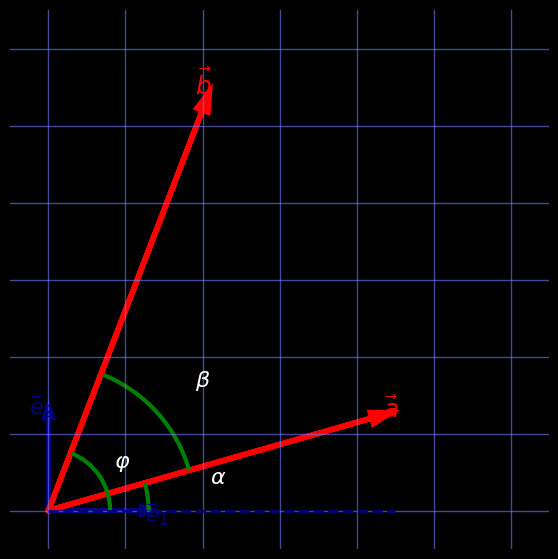

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# --- Figure setup ---
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect('equal')

# Limits
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-0.5, 6.5)

# --- Grid (light blue) ---
ax.set_xticks(np.arange(0, 7, 1))
ax.set_yticks(np.arange(0, 7, 1))
ax.grid(True, color='#6f7cff', linewidth=1, alpha=0.6)

# Remove spines and ticks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# --- Basis vectors e1, e2 (blue) ---
ax.arrow(0, 0, 1.2, 0, head_width=0.12, head_length=0.18,
         fc='navy', ec='navy', linewidth=3)
ax.arrow(0, 0, 0, 1.2, head_width=0.12, head_length=0.18,
         fc='navy', ec='navy', linewidth=3)

ax.text(1.25, -0.15, r"$\vec e_1$", fontsize=16, color='navy')
ax.text(-0.25, 1.25, r"$\vec e_2$", fontsize=16, color='navy')

# --- Dashed baseline ---
ax.plot([0, 4.5], [0, 0], linestyle='--', color='navy', linewidth=2)

# --- Red vectors a and b ---
a = np.array([4.2, 1.2])
b = np.array([2.0, 5.2])

ax.arrow(0, 0, a[0], a[1], head_width=0.15, head_length=0.25,
         fc='red', ec='red', linewidth=4)
ax.arrow(0, 0, b[0], b[1], head_width=0.15, head_length=0.25,
         fc='red', ec='red', linewidth=4)

ax.text(a[0] + 0.15, a[1], r"$\vec a$", fontsize=18, color='red')
ax.text(b[0] - 0.1, b[1] + 0.2, r"$\vec b$", fontsize=18, color='red')

# --- Angle arcs ---
# alpha (between e1 and a)
alpha_arc = Arc((0, 0), 2.6, 2.6, angle=0,
                theta1=0, theta2=16,
                color='green', linewidth=3)
ax.add_patch(alpha_arc)
ax.text(2.1, 0.35, r"$\alpha$", fontsize=16)

# phi (between e1 and b)
phi_arc = Arc((0, 0), 1.6, 1.6, angle=0,
              theta1=0, theta2=68,
              color='green', linewidth=3)
ax.add_patch(phi_arc)
ax.text(0.85, 0.55, r"$\varphi$", fontsize=16)

# beta (between a and b)
beta_arc = Arc((0, 0), 3.8, 3.8, angle=0,
               theta1=16, theta2=68,
               color='green', linewidth=3)
ax.add_patch(beta_arc)
ax.text(1.9, 1.6, r"$\beta$", fontsize=16)

plt.show()

Consider two arbitrary vectors
$$
\vec a =
\begin{pmatrix}
a_1 \\
a_2
\end{pmatrix},
\qquad
\vec b =
\begin{pmatrix}
b_1 \\
b_2
\end{pmatrix}
$$
(see the picture).

First of all, note that according to the Pythagorean theorem, the lengths of $\vec a$ and $\vec b$ (in fact, of any vector in the plane) can be calculated using the dot product:
$$
\|\vec a\| = \sqrt{a_1^2 + a_2^2} = \sqrt{\vec a \cdot \vec a},
\qquad
\|\vec b\| = \sqrt{b_1^2 + b_2^2} = \sqrt{\vec b \cdot \vec b}.
$$

Now let $\varphi$ be the angle between $\vec a$ and $\vec b$.
If $\alpha$ is the angle between $\vec a$ and $\vec e_1$, and $\beta$ is the angle between $\vec b$ and $\vec e_1$, then
$$
\varphi = \beta - \alpha.
$$

By definition,
$$
\cos(\alpha) = \frac{a_1}{\|\vec a\|},
\qquad
\sin(\alpha) = \frac{a_2}{\|\vec a\|},
$$
and
$$
\cos(\beta) = \frac{b_1}{\|\vec b\|},
\qquad
\sin(\beta) = \frac{b_2}{\|\vec b\|}.
$$

Using the trigonometric identity
$$
\cos(\beta - \alpha) = \cos(\beta)\cos(\alpha) + \sin(\beta)\sin(\alpha),
$$
we obtain
$$
\begin{aligned}
\cos(\varphi)
&= \cos(\beta - \alpha) \\
&= \frac{b_1}{\|\vec b\|}\cdot\frac{a_1}{\|\vec a\|}
  + \frac{b_2}{\|\vec b\|}\cdot\frac{a_2}{\|\vec a\|} \\
&= \frac{a_1 b_1 + a_2 b_2}{\|\vec a\|\cdot\|\vec b\|}.
\end{aligned}
$$

By definition,
$$
a_1 b_1 + a_2 b_2 = \vec a \cdot \vec b.
$$
Therefore,
$$
\cos(\varphi)
=
\frac{\vec a \cdot \vec b}{\|\vec a\|\cdot\|\vec b\|}
\quad \Longrightarrow \quad
\vec a \cdot \vec b
=
\|\vec a\|\cdot\|\vec b\|\cdot\cos(\varphi).
$$

This is the most important connection between the algebraic and geometric points of view on the dot product. A purely algebraic computation—the sum of pairwise products of coordinates—gives exactly the same result as the geometric expression involving vector lengths and the cosine of the angle between them.

From this, we obtain the fundamental criterion:

**Two vectors are perpendicular if and only if their dot product is equal to zero.**

Indeed, this follows from the fact that the cosine of a right angle is zero.

## Multidimensional Generalization

The idea that the dot product is connected with vector lengths and angles can be extended far beyond the two-dimensional case $\mathbb{R}^2$. For example, in $\mathbb{R}^3$ it yields the well-known generalization of the Pythagorean theorem. In fact, in the general case, this dot-product intuition provides the simplest way to define lengths and angles in $\mathbb{R}^n$ for any natural number $n$.

Let
$$
\vec x =
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix},
\qquad
\vec y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$
be vectors in $\mathbb{R}^n$.

### Length of a Vector

The length (or norm) of $\vec x$ is defined as
$$
\|\vec x\|
=
\sqrt{\vec x \cdot \vec x}
=
\sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}.
$$

### Angle Between Two Vectors

The cosine of the angle between $\vec x$ and $\vec y$ is defined by
$$
\cos(\angle(\vec x, \vec y))
=
\frac{\vec x \cdot \vec y}{\|\vec x\|\cdot\|\vec y\|}
=
\frac{x_1 y_1 + x_2 y_2 + \cdots + x_n y_n}
{\sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}\;
 \sqrt{y_1^2 + y_2^2 + \cdots + y_n^2}}.
$$

There is an ambiguity when defining the angle itself, since angles differing by multiples of $360^\circ$ have the same cosine. To avoid this, the angle is usually defined as
$$
\angle(\vec x, \vec y)
=
\arccos\!\left(
\frac{\vec x \cdot \vec y}{\|\vec x\|\cdot\|\vec y\|}
\right),
$$
which always yields a value in $[0,\pi]$.

### Squares and Orthogonality

The dot product of a vector with itself is often called the **square** of the vector and is denoted by
$$
\vec x^{\,2} \quad \text{or simply} \quad x^2.
$$
Thus,
$$
\|\vec x\|^2 = \vec x^{\,2}.
$$

Two vectors $\vec x$ and $\vec y$ are called **orthogonal** (or perpendicular) if
$$
\vec x \cdot \vec y = 0.
$$

### Example in $\mathbb{R}^5$

Consider the five-dimensional vector space $\mathbb{R}^5$. Although we cannot visualize it, the dot product allows us to compute lengths and angles purely algebraically.

Let
$$
\vec x =
\begin{pmatrix}
1 \\
1 \\
-1 \\
0 \\
1
\end{pmatrix},
\qquad
\vec y =
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
1
\end{pmatrix}.
$$

The length of $\vec x$ is
$$
\|\vec x\|
=
\sqrt{1^2 + 1^2 + (-1)^2 + 0^2 + 1^2}
=
\sqrt{4}
=
2.
$$

The length of $\vec y$ is
$$
\|\vec y\|
=
\sqrt{1^2 + 0^2 + 0^2 + 0^2 + 1^2}
=
\sqrt{2}.
$$

The angle between $\vec x$ and $\vec y$ is
$$
\begin{aligned}
\angle(\vec x, \vec y)
&=
\arccos\!\left(
\frac{\vec x \cdot \vec y}{\|\vec x\|\cdot\|\vec y\|}
\right) \\
&=
\arccos\!\left(
\frac{1 + 0 + 0 + 0 + 1}{2 \cdot \sqrt{2}}
\right) \\
&=
\arccos\!\left(\frac{1}{\sqrt{2}}\right)
=
45^\circ.
\end{aligned}
$$

Note that to find this purely geometric characteristic of the vectors’ relative position, we did not draw any pictures—we relied entirely on simple algebraic calculations.

### A Final Observation

Multidimensionality also works in the opposite direction. If we take $n = 1$, then $\mathbb{R}^1 = \mathbb{R}$, and the dot product reduces to ordinary multiplication of real numbers.

## A Few Words on Applications

At this point, one might reasonably object: of course it is fascinating that we can compute geometric quantities in high-dimensional spaces, but is this not merely a mathematical fantasy—something suitable only for science fiction movies or abstract contemplation?

In reality, the dot product has many **very practical applications**.

In physics, it is used ubiquitously. This is not only because certain physical theories describe spacetime as having 10 or even 26 dimensions, but mainly because physicists rarely work directly with physical space itself. Instead, they operate in so-called **phase spaces**, which arise naturally from systems of equations describing physical phenomena. These spaces can have arbitrary dimension, and within them it is essential to perform geometric computations such as measuring angles, projections, and distances.

Similarly, in game development, the dot product is indispensable for describing rotations, movements, collisions, and light intensities.

In **machine learning and data analysis**, data is typically represented as lists, vectors, or arrays, which naturally form vector spaces. The core idea of data analysis is to detect and exploit **geometric patterns** in these spaces in order to make predictions or classify data. Without the ability to measure lengths, angles, and similarities between vectors, this would be impossible. Consequently, dot products appear everywhere in these fields.

The key philosophical takeaway is the following:
the operation we have constructed—the dot product—and its generalizations allow us to equip objects that are not inherently geometric with a **geometric structure**. Once this structure is in place, we can compute distances and angles for them just as easily as we once did for vectors drawn on graph paper in elementary school.

## Conclusion

- The **dot product** is an operation that assigns a real number to any pair of vectors in $\mathbb{R}^n$.

- For vectors
  $$
  \vec x =
  \begin{pmatrix}
  x_1, x_2, \dots, x_n
  \end{pmatrix}^T,
  \qquad
  \vec y =
  \begin{pmatrix}
  y_1, y_2, \dots, y_n
  \end{pmatrix}^T,
  $$
  the dot product is defined as
  $$
  \vec x \cdot \vec y
  =
  x_1 y_1 + x_2 y_2 + \cdots + x_n y_n .
  $$

- The dot product allows us to define the **length** of a vector and the **angle** between two vectors in a vector space. In particular,
  $$
  \|\vec v\| = \sqrt{\vec v \cdot \vec v},
  $$
  and the angle between $\vec v$ and $\vec w$ is given by
  $$
  \angle(\vec v, \vec w)
  =
  \arccos\!\left(
  \frac{\vec v \cdot \vec w}{\|\vec v\| \cdot \|\vec w\|}
  \right).
  $$

- For any two vectors $\vec v$ and $\vec w$ with angle $\varphi$ between them,
  $$
  \vec v \cdot \vec w
  =
  \|\vec v\| \cdot \|\vec w\| \cdot \cos(\varphi).
  $$

- Two vectors $\vec v_1$ and $\vec v_2$ such that
  $$
  \vec v_1 \cdot \vec v_2 = 0
  $$
  are called **orthogonal** (or **perpendicular**).